## Importing essential library

In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
import string
import nltk
%matplotlib inline 
import plotly as py
import cufflinks as cf

## Opening the data 

In [2]:
df =pd.read_csv("test]/2chem2gene_abstract_chemAcronym_new.i2qy_fb6c04c1-a2a9-44c7-8e30-97e801c33624.tsv",delimiter = '\t')

In [7]:
# showing the first 5 rows
df.head()

,[SNID] Subject,[PT] Subject,Subject,Predicate,[SNID] Object,[PT] Object,Object,Sentence,Location,#Docs,Doc#,Doc,Source,#Hits,Hit#,Hit
0,nlm.D006684,HLA-DR Antigens,HLA-DR,increased,ncbi.920,CD4,CD4,The results showed decreased expression of HLA...,Standard Abstract,4,1,15248671,https://www.ncbi.nlm.nih.gov/pubmed/15248671,1,1,Prognosis of gallbladder carcinoma is poor. Th...
1,nlm.D006684,HLA-DR Antigens,HLA-DR,increased,ncbi.920,CD4,CD4,The results showed decreased expression of HLA...,Standard Abstract,4,2,16372671,https://www.ncbi.nlm.nih.gov/pubmed/16372671,1,1,Prognosis of colonic carcinoma is poor. The tw...
2,nlm.D006684,HLA-DR Antigens,HLA-DR,increased,ncbi.920,CD4,CD4,The results showed decreased expression of HLA...,Standard Abstract,4,3,15736043,https://www.ncbi.nlm.nih.gov/pubmed/15736043,1,1,Serous papillary carcinomas of the endometrium...
3,nlm.D006684,HLA-DR Antigens,HLA-DR,increased,ncbi.920,CD4,CD4,The results showed decreased expression of HLA...,Standard Abstract,4,4,14598186,https://www.ncbi.nlm.nih.gov/pubmed/14598186,1,1,The antigens encoded by the major histocompabi...
4,nal_thesaurus.3990,lipids,biologically derived lipids,began,ncbi.55294,FBXW7,ago,The systematic study of the mesomorphic phase ...,Standard Abstract,3,1,2054909,https://www.ncbi.nlm.nih.gov/pubmed/2054909,1,1,The systematic study of the mesomorphic phase ...


In [8]:
df.shape

(773101, 16)

In [9]:
df.describe()

,#Docs,Doc#,Doc,#Hits,Hit#
count,773101.000000,773101.000000,7.731010e+05,773101.000000,773101.000000
mean,1.002368,1.001182,1.633048e+07,1.006043,1.003022
std,0.050642,0.035329,8.788731e+06,0.078250,0.055238
min,1.000000,1.000000,3.900000e+01,1.000000,1.000000
25%,1.000000,1.000000,9.126805e+06,1.000000,1.000000
50%,1.000000,1.000000,1.668152e+07,1.000000,1.000000
75%,1.000000,1.000000,2.375681e+07,1.000000,1.000000
max,4.000000,4.000000,3.155697e+07,4.000000,4.000000


In [10]:
df['[SNID] Subject'].value_counts()

nal_thesaurus.876                                        13106
nal_thesaurus.6421                                        9229
nal_thesaurus.1560                                        7896
nlm.D000906_group_29_3416ae7808989f28a285db37d4b00b5c     7614
nlm.D000906_group_30_8611b23d8360560c11a88f0a393acb90     7614
                                                         ...  
nal_thesaurus.265177                                         1
nal_thesaurus.271019                                         1
nal_thesaurus.274627                                         1
nal_thesaurus.278590                                         1
nlm.D000076250                                               1
Name: [SNID] Subject, Length: 12317, dtype: int64

## new strategy

Since our dataset contains a huge volume of information, it takes so much time to analysis it.<br>$*$ we reduce the volume by fraction 0.002 and mix the data.

In [11]:
data=df.sample(frac=0.002)
data

,[SNID] Subject,[PT] Subject,Subject,Predicate,[SNID] Object,[PT] Object,Object,Sentence,Location,#Docs,Doc#,Doc,Source,#Hits,Hit#,Hit
648010,nlm.D015123,"7,8-Dihydro-7,8-dihydroxybenzo(a)pyrene 9,10-o...",BPDE,also activates,ncbi.3725,JUN,AP-1,BPDE also activates AP-1 several folds in AP-1...,Standard Abstract,1,1,18093576,https://www.ncbi.nlm.nih.gov/pubmed/18093576,1,1,"Cadmium, a major metal constituent of tobacco ..."
40007,chebi.44915,propofol,propofol,beats,ncbi.8706,B3GALNT1,p,PR increased following ketofol (by 35 ± 20 bea...,Standard Abstract,1,1,24890224,https://www.ncbi.nlm.nih.gov/pubmed/24890224,1,1,To compare anaesthetic induction in healthy do...
492848,nlm.D005680_group_2_8c524e4c1a0f1147e45dce8d45...,gamma-Aminobutyric Acid,GABA(A) Rs,mediating,ncbi.351,APP,α4,Using global and single-cell targeted gene del...,Standard Abstract,1,1,21722213,https://www.ncbi.nlm.nih.gov/pubmed/21722213,1,1,GABAergic transmission regulates adult neuroge...
385357,nlm.D000255,Adenosine Triphosphate,ATP,allow,ncbi.51761,ATP8A2,ATP,"The addition of oligomycin during 2, 4-dinitro...",Standard Abstract,1,1,16659027,https://www.ncbi.nlm.nih.gov/pubmed/16659027,1,1,"The effect of mono-, di-, and trinucleoside ph..."
734815,nlm.D042461,Vascular Endothelial Growth Factor A,VEGF,may function,ncbi.10195,ALG3,not,These results suggest that VEGF is closely rel...,Standard Abstract,1,1,16488441,https://www.ncbi.nlm.nih.gov/pubmed/16488441,1,1,We have demonstrated that apoptosis was detect...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175555,nal_thesaurus.7925,ammonia,Rumen ammonia-N levels,tended,ncbi.4948,OCA2,p,Rumen ammonia-N levels tended (p = 0.087) to i...,Standard Abstract,1,1,31480147,https://www.ncbi.nlm.nih.gov/pubmed/31480147,1,1,An experiment was conducted to determine the e...
202280,nal_thesaurus.12337,G-proteins,GTP-binding proteins,may couple,ncbi.5319,PLA2G1B,PLA2,We have tested the hypothesis that GTP-binding...,Standard Abstract,1,1,8397512,https://www.ncbi.nlm.nih.gov/pubmed/8397512,1,1,Interferon-gamma (IFN-gamma) is a potent growt...
379769,nlm.D000199,Actins,actin,enhances,ncbi.3295,HSD17B4,DBP,"Furthermore, binding of actin to DBP enhances ...",Standard Abstract,1,1,2339982,https://www.ncbi.nlm.nih.gov/pubmed/2339982,1,1,We have labelled the rat vitamin D binding pro...
590201,nlm.D010725,Phosphocreatine,the phosphocreatine,produced,ncbi.1119,CHKA,Mi-CK,The antisense-induced decrease in Mi-CK mRNA a...,Standard Abstract,1,1,9059988,https://www.ncbi.nlm.nih.gov/pubmed/9059988,1,1,Antisense strategy has been used to inhibit th...


## export the data to new file

In [12]:
data.to_csv("export_file.csv",index=False)

## using only two columns of dataset <br> $point$: we could add another column as well

In [13]:
df = pd.read_csv(r'export_file.csv',usecols=['Object','[PT] Subject'])
df

,[PT] Subject,Object
0,"7,8-Dihydro-7,8-dihydroxybenzo(a)pyrene 9,10-o...",AP-1
1,propofol,p
2,gamma-Aminobutyric Acid,α4
3,Adenosine Triphosphate,ATP
4,Vascular Endothelial Growth Factor A,not
...,...,...
1541,ammonia,p
1542,G-proteins,PLA2
1543,Actins,DBP
1544,Phosphocreatine,Mi-CK


## we use two methods:

Using NLTK solution that consider the stopwords like (+ , [])

C:\Users\Koosha\AppData\Local\Temp/ipykernel_1944/312512261.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



All frequencies, including STOPWORDS:
   Word  Frequency
0     p        165
1     )         76
2     (         72
3   not         34
4     [         19
5     ]         18
6     a         18
7  trna         18
8  ca2+         16
9     i         14


<AxesSubplot:xlabel='Word'>

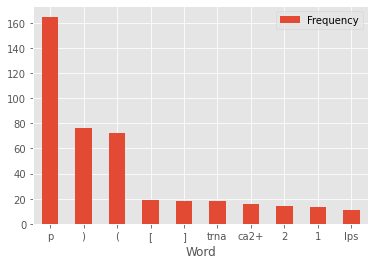

In [14]:
top_N = 10
txt = df.Object.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)

this methods does not consider stopword

          Frequency
Word               
p               163
trna             15
lps              11
[ca2+]           10
camp             10
cats              9
receptor          9
insulin           9
sbp               9
alpha             9


<AxesSubplot:xlabel='Word'>

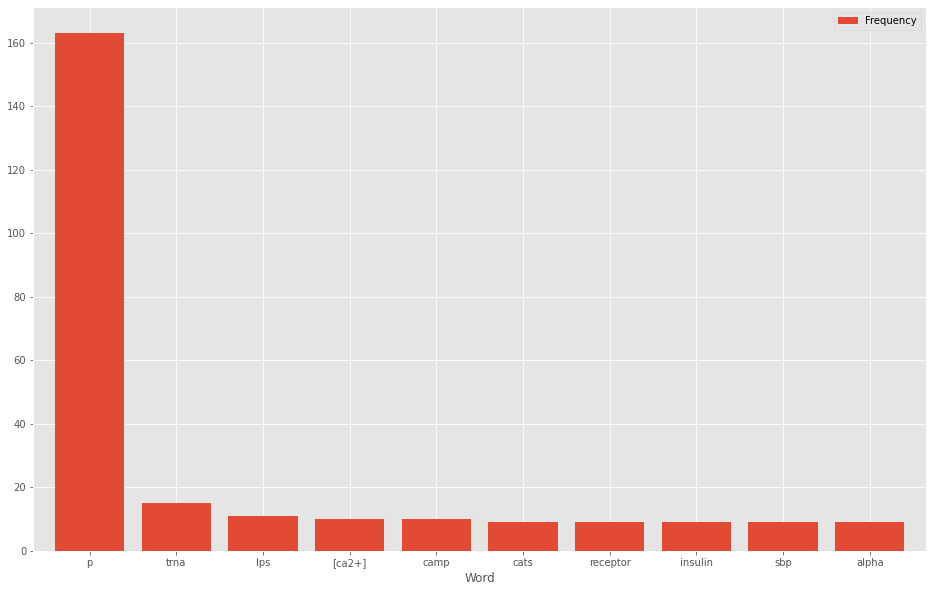

In [15]:
from collections import Counter
top_N = 10


stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df.Object
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

In [19]:
df

,[PT] Subject,Object
0,"7,8-Dihydro-7,8-dihydroxybenzo(a)pyrene 9,10-o...",AP-1
1,propofol,p
2,gamma-Aminobutyric Acid,α4
3,Adenosine Triphosphate,ATP
4,Vascular Endothelial Growth Factor A,not
...,...,...
1541,ammonia,p
1542,G-proteins,PLA2
1543,Actins,DBP
1544,Phosphocreatine,Mi-CK


In [20]:
df2=df.loc[df['Object'] == 'insulin', '[PT] Subject']
df2.value_counts()

Antibodies                     1
gamma-hexachlorocyclohexane    1
Insulin                        1
Lipid Peroxides                1
C-Peptide                      1
Tyrosine                       1
DEET                           1
Blood Glucose                  1
Glucagon                       1
Name: [PT] Subject, dtype: int64